# [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
# Find the overall conversion rate of your store.
# Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
dataset = pd.read_csv('2019-Oct.csv', header='infer',
                      parse_dates = ['event_time'],
                      date_parser=pd.to_datetime,
                     nrows=2000000)

#### Find the overall conversion rate of your store.

In [85]:
num = dataset[dataset.event_type == 'purchase'].groupby([dataset.product_id]).product_id.count().sum()
denom = dataset[dataset.event_type == 'view'].groupby([dataset.product_id]).product_id.count().sum()
overall_conv_rate = num / denom
print(overall_conv_rate)

0.017492252228807355


#### Plot the number of purchases of each category

In [81]:
dropna_dataset = dataset[dataset.event_type == 'purchase']
dropna_dataset = dataset.dropna(subset=["category_code"])

In [82]:
dropna_dataset.category_code.replace('(?=\.).*','',regex=True, inplace = True)

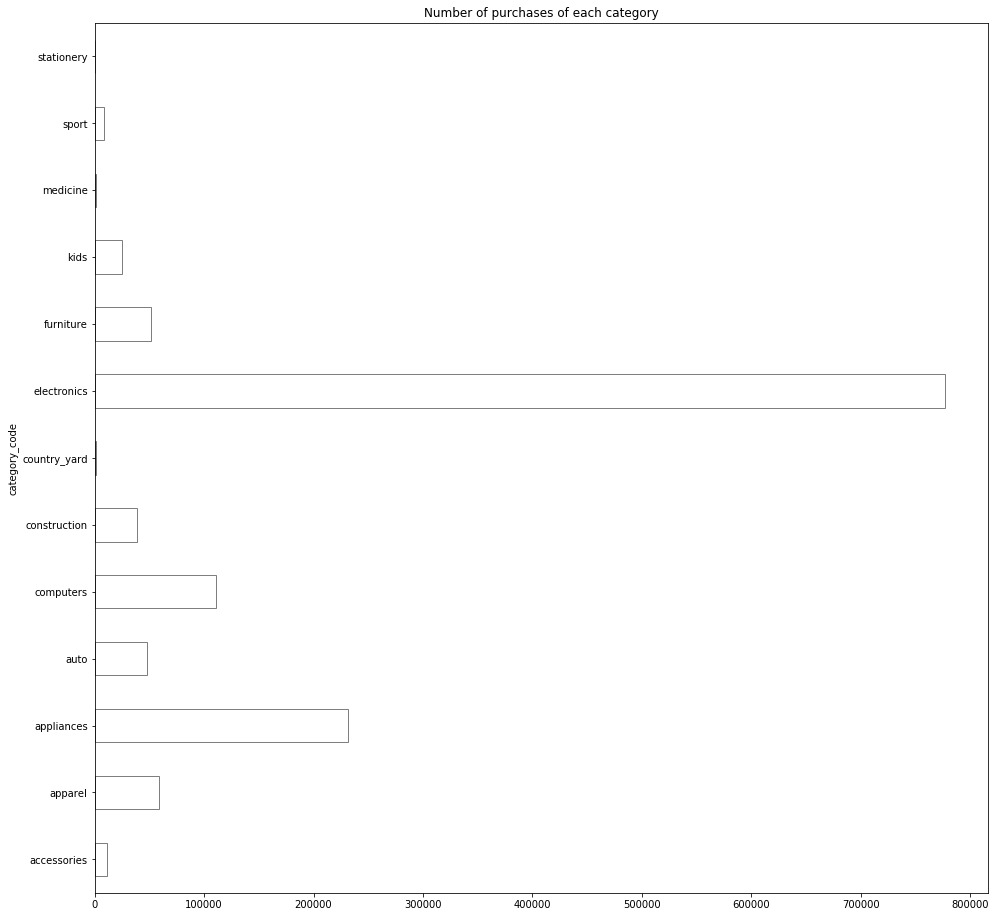

In [83]:
dropna_dataset = dropna_dataset.groupby([dropna_dataset.category_code]).category_code.count()
dropna_dataset.plot.barh(figsize=(16,16),\
                                 title="Number of purchases of each category",\
                                  color="white", edgecolor="black", alpha=0.5)
plt.show()

#### show the conversion rate of each category in decreasing order.